In [2]:
import requests, zipfile
import io
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn


url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header = None)

mushroom.columns = ['classes', 'cap_shape','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root',
                                     'stalk_surface_above_ring','stalk_surface_below_ring',
                                 'stalck_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']

mushroom

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalck_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
print('Data Shape : {}'.format(mushroom.shape))
print('결측값 갯수 : {}'.format(mushroom.isnull().sum().sum()))

Data Shape : (8124, 23)
결측값 갯수 : 0


In [4]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,flg
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [10]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


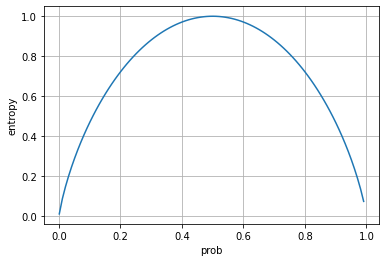

In [13]:
#의사결정나무는 다수의 변수 중 어떤 변수에서 가장 효과적으로 분기할 수 있는지 발견하는 알고리즘이므로 entropy 계산을 통한 불순도 확인
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

p = np.arange(0.001, 0.999, 0.01)
plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [20]:
mushroom_dummy.groupby('flg')['flg'].count()
entropy_init = - (0.518 * np.log2(0.518) +0.482 * np.log2(0.482))
print('독버섯 데이터 엔트로피 초기값 : {:.3f}'.format(entropy_init))

독버섯 데이터 엔트로피 초기값 : 0.999


In [18]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [24]:
p1 = 4176 / (4176 + 3904)
p2 = 1 - p1
p3 = 32 / (32+12)
p4 = 1 - p3
entropy_c0 = -(p1 * np.log2(p1) + p2*np.log2(p2))
entropy_c1 = -(p3 * np.log2(p3) + p4*np.log2(p4))
print('entropy_c0 : {:.3f}'.format(entropy_c0))
print('entropy_c1 : {:.3f}'.format(entropy_c1))

entropy_c0 : 0.999
entropy_c1 : 0.845


In [25]:
entropy_after = (4176+3904) / 8124*entropy_c0 + (32+12) / 8124 * entropy_c1
print('데이터 분할 후 평균 엘트로피 : {:.3f}'.format(entropy_after))

데이터 분할 후 평균 엘트로피 : 0.998


In [27]:
print('변수 cap_color 기준으로 분할 했을 때의 정보이득 : {:.3f}'.format(entropy_init - entropy_after))

변수 cap_color 기준으로 분할 했을 때의 정보이득 : 0.001


In [29]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [32]:
p1 = 4208/(4208+2188)
p2 = 1 - p1
entropy_b0 = - (p1*np.log2(p1) + p2*np.log2(p2))

p3 = 0/(0+1728)
p4 = 1 - p3
entropy_b1 = - (p4*np.log2(p4))

entropy_after = (4208+2188) / 8124*entropy_b0 + (0+1728) / 8124*entropy_b1
print('변수 gill_color 기준으로 분할했을 때의 정보이득 : {:.3f}'.format(entropy_init - entropy_after))

변수 gill_color 기준으로 분할했을 때의 정보이득 : 0.269
